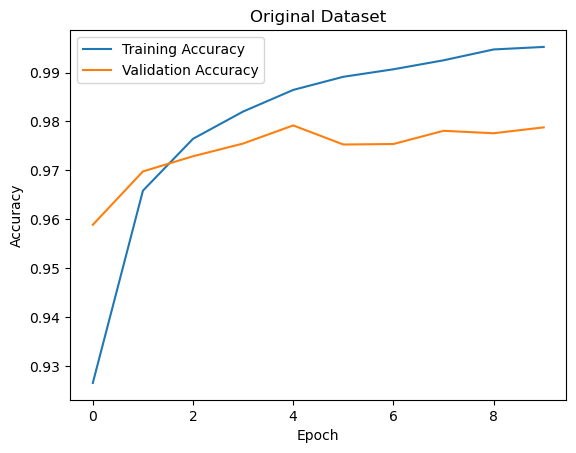

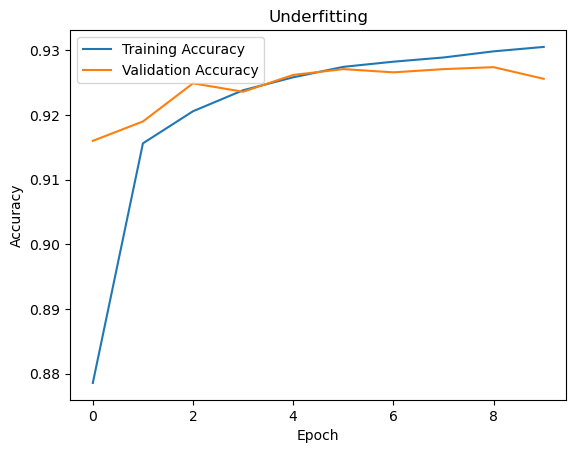

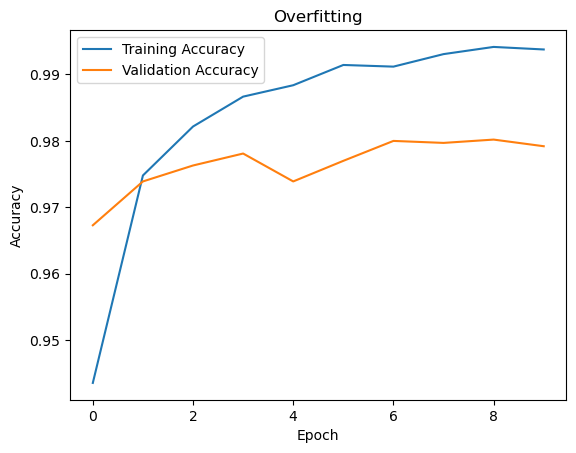

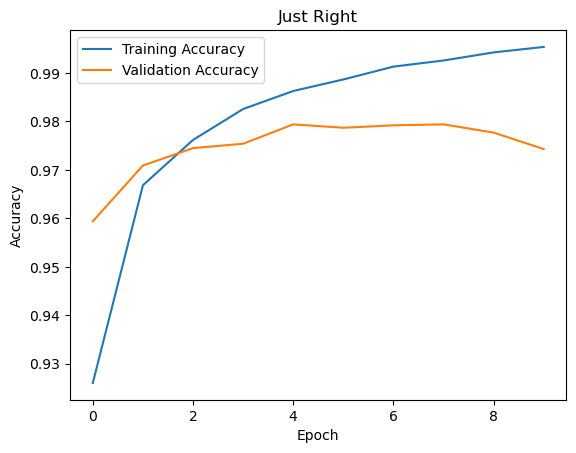

<Figure size 640x480 with 0 Axes>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build a simple neural network model
def build_model():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Function to train the model and plot accuracy
def train_and_plot(model, epochs, title):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs,
                        validation_data=(test_images, test_labels), verbose=0)

    # Plot accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    plt.clf()  # Clear the plot for the next set of plots

# Plot for the original dataset
model_original = build_model()
train_and_plot(model_original, epochs=10, title='Original Dataset')

# Introduce underfitting by reducing the model complexity
model_underfit = models.Sequential([layers.Flatten(input_shape=(28, 28)),
                                     layers.Dense(10, activation='softmax')])
train_and_plot(model_underfit, epochs=10, title='Underfitting')

# Introduce overfitting by increasing the model complexity
model_overfit = models.Sequential([layers.Flatten(input_shape=(28, 28)),
                                   layers.Dense(512, activation='relu'),
                                   layers.Dense(512, activation='relu'),
                                   layers.Dense(10, activation='softmax')])
train_and_plot(model_overfit, epochs=10, title='Overfitting')

# Train a model with an appropriate complexity
model_just_right = build_model()
train_and_plot(model_just_right, epochs=10, title='Just Right')


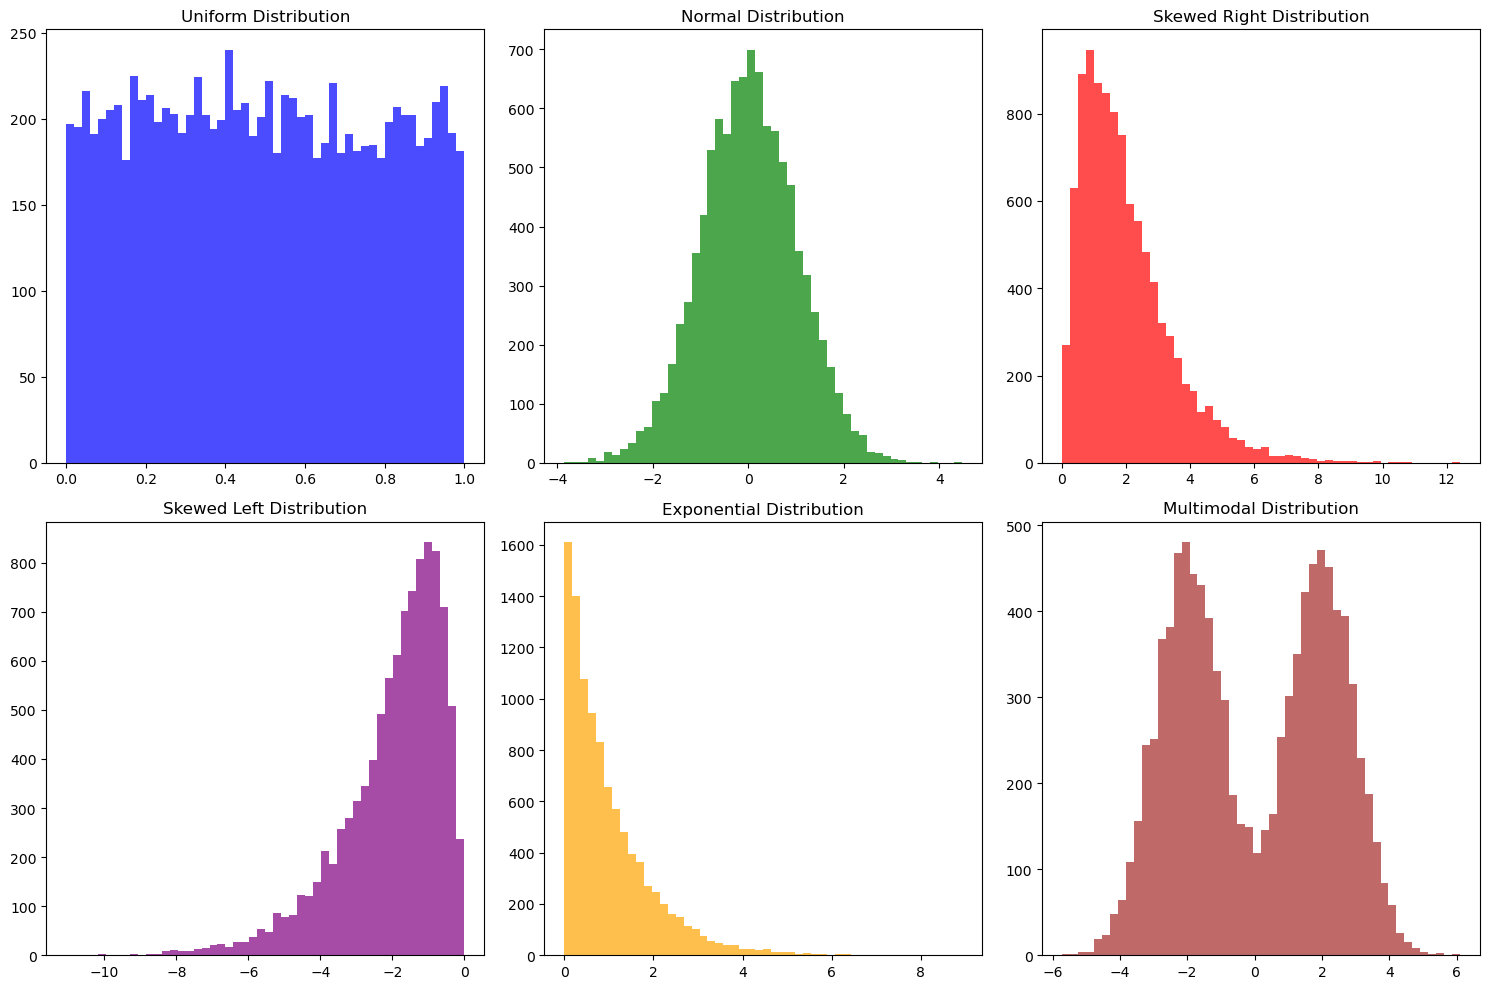

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, _), (_, _) = mnist.load_data()

# Flatten the images to 1D arrays
flattened_images = train_images.reshape(-1, 784)

# Generate different sets of data
uniform_data = np.random.uniform(0, 1, 10000)
normal_data = np.random.normal(0, 1, 10000)
skewed_right_data = np.random.gamma(2, 1, 10000)
skewed_left_data = -np.random.gamma(2, 1, 10000)
exponential_data = np.random.exponential(1, 10000)
multimodal_data = np.concatenate([np.random.normal(-2, 1, 5000), np.random.normal(2, 1, 5000)])

# Plot histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(uniform_data, bins=50, color='blue', alpha=0.7)
plt.title('Uniform Distribution')

plt.subplot(2, 3, 2)
plt.hist(normal_data, bins=50, color='green', alpha=0.7)
plt.title('Normal Distribution')

plt.subplot(2, 3, 3)
plt.hist(skewed_right_data, bins=50, color='red', alpha=0.7)
plt.title('Skewed Right Distribution')

plt.subplot(2, 3, 4)
plt.hist(skewed_left_data, bins=50, color='purple', alpha=0.7)
plt.title('Skewed Left Distribution')

plt.subplot(2, 3, 5)
plt.hist(exponential_data, bins=50, color='orange', alpha=0.7)
plt.title('Exponential Distribution')

plt.subplot(2, 3, 6)
plt.hist(multimodal_data, bins=50, color='brown', alpha=0.7)
plt.title('Multimodal Distribution')

plt.tight_layout()
plt.show()


# Three normal distributions with different means but identical standard deviations.

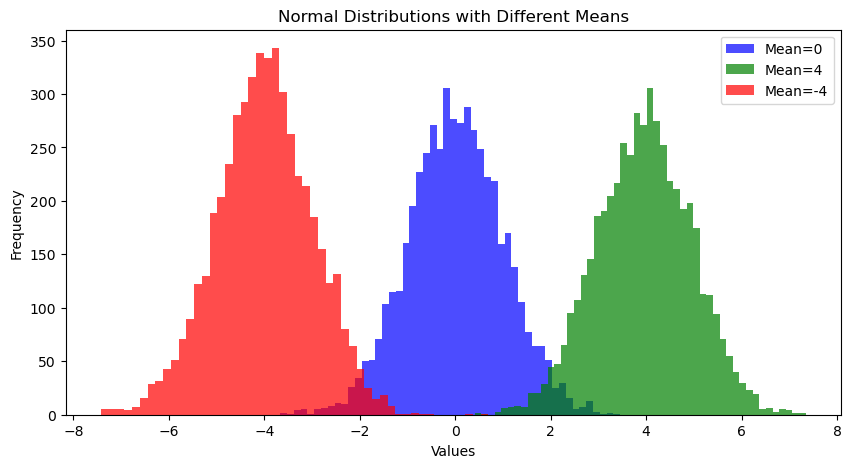

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, _), (_, _) = mnist.load_data()

# Flatten the images to 1D arrays
flattened_images = train_images.reshape(-1, 784)

# Generate three normal distributions with different means
mean1, mean2, mean3 = 0, 4, -4
std_dev = 1
size_per_distribution = 5000

normal_data1 = np.random.normal(mean1, std_dev, size_per_distribution)
normal_data2 = np.random.normal(mean2, std_dev, size_per_distribution)
normal_data3 = np.random.normal(mean3, std_dev, size_per_distribution)

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(normal_data1, bins=50, color='blue', alpha=0.7, label=f'Mean={mean1}')
plt.hist(normal_data2, bins=50, color='green', alpha=0.7, label=f'Mean={mean2}')
plt.hist(normal_data3, bins=50, color='red', alpha=0.7, label=f'Mean={mean3}')

plt.title('Normal Distributions with Different Means')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.show()


# Three normal distributions with identical means but differen standard deviations.

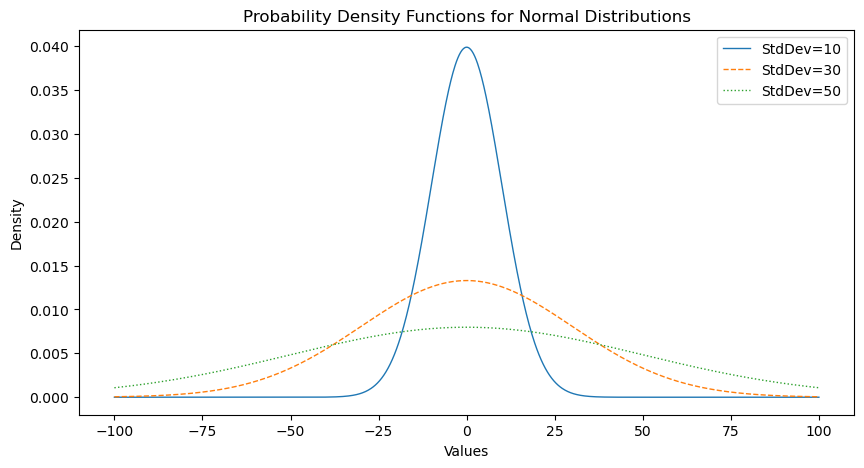

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, _), (_, _) = mnist.load_data()

# Flatten the images to 1D arrays
flattened_images = train_images.reshape(-1, 784)

# Generate data for three normal distributions with identical means
mean = 0
std_dev1, std_dev2, std_dev3 = 10, 30, 50
x = np.linspace(-100, 100, 1000)

# Calculate the probability density function (PDF) for each distribution
pdf1 = norm.pdf(x, mean, std_dev1)
pdf2 = norm.pdf(x, mean, std_dev2)
pdf3 = norm.pdf(x, mean, std_dev3)

# Plot line graphs for the PDFs with different line styles
plt.figure(figsize=(10, 5))

plt.plot(x, pdf1, label=f'StdDev={std_dev1}', linestyle='-', linewidth=1)
plt.plot(x, pdf2, label=f'StdDev={std_dev2}', linestyle='--', linewidth=1)
plt.plot(x, pdf3, label=f'StdDev={std_dev3}', linestyle=':', linewidth=1)

plt.title('Probability Density Functions for Normal Distributions')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()

plt.show()


# 68 􀀀 95 􀀀 99:7 rule

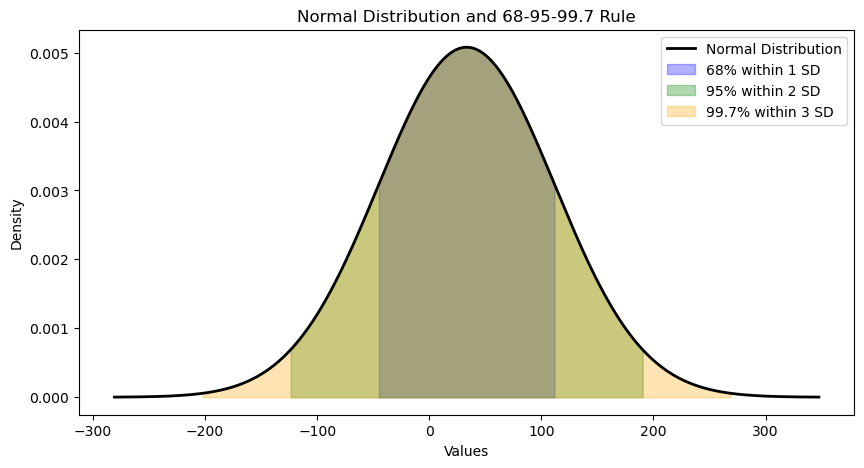

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, _), (_, _) = mnist.load_data()

# Flatten the images to 1D arrays
flattened_images = train_images.reshape(-1, 784)

# Calculate mean and standard deviation of the pixel values
mean_value = flattened_images.mean()
std_dev_value = flattened_images.std()

# Generate data points for the normal distribution
x = np.linspace(mean_value - 4 * std_dev_value, mean_value + 4 * std_dev_value, 1000)
pdf = (1 / (std_dev_value * np.sqrt(2 * np.pi))) * np.exp(-(x - mean_value)**2 / (2 * std_dev_value**2))

# Plot the normal distribution curve
plt.figure(figsize=(10, 5))
plt.plot(x, pdf, label='Normal Distribution', color='black', linewidth=2)

# Highlight the areas within 1, 2, and 3 standard deviations
plt.fill_between(x, pdf, where=[(xi >= mean_value - std_dev_value) and (xi <= mean_value + std_dev_value) for xi in x], color='blue', alpha=0.3, label='68% within 1 SD')
plt.fill_between(x, pdf, where=[(xi >= mean_value - 2 * std_dev_value) and (xi <= mean_value + 2 * std_dev_value) for xi in x], color='green', alpha=0.3, label='95% within 2 SD')
plt.fill_between(x, pdf, where=[(xi >= mean_value - 3 * std_dev_value) and (xi <= mean_value + 3 * std_dev_value) for xi in x], color='orange', alpha=0.3, label='99.7% within 3 SD')

# Add legend and labels
plt.legend()
plt.title('Normal Distribution and 68-95-99.7 Rule')
plt.xlabel('Values')
plt.ylabel('Density')

plt.show()


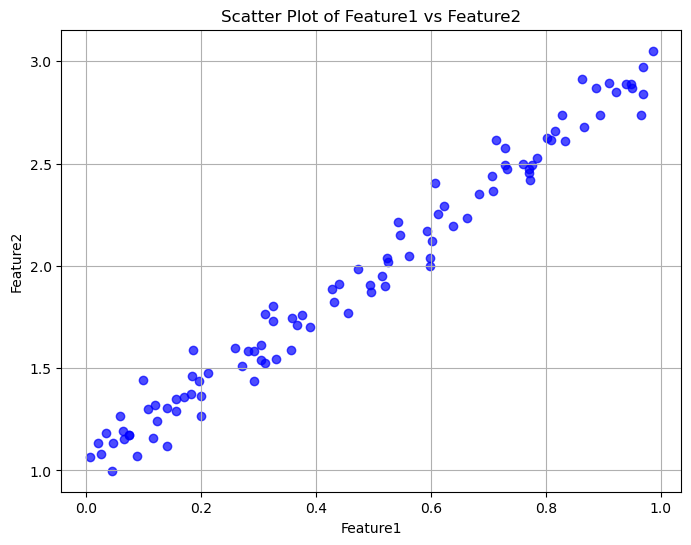

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for two features
np.random.seed(42)
feature1 = np.random.rand(100)
feature2 = 2 * feature1 + 1 + 0.1 * np.random.randn(100)  # Simulating a linear relationship

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(feature1, feature2, color='blue', marker='o', alpha=0.7)

# Add labels and title
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.grid(True)
plt.show()


# negative covariance

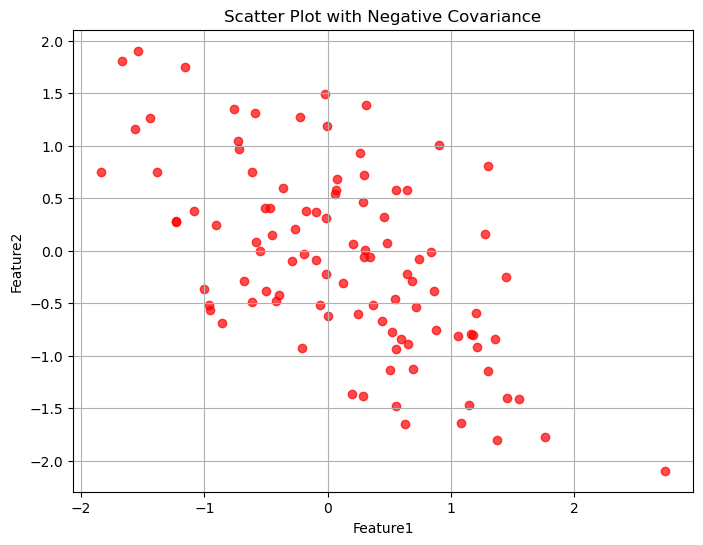

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate random data with a negative covariance
mean = [0, 0]
covariance_matrix = [[1, -0.7], [-0.7, 1]]  # Negative covariance

# Create a random dataset
data = np.random.multivariate_normal(mean, covariance_matrix, 100)

# Extract two features from the dataset
feature1 = data[:, 0]
feature2 = data[:, 1]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(feature1, feature2, color='red', marker='o', alpha=0.7)

# Add labels and title
plt.title('Scatter Plot with Negative Covariance')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.grid(True)
plt.show()


# positive covariance

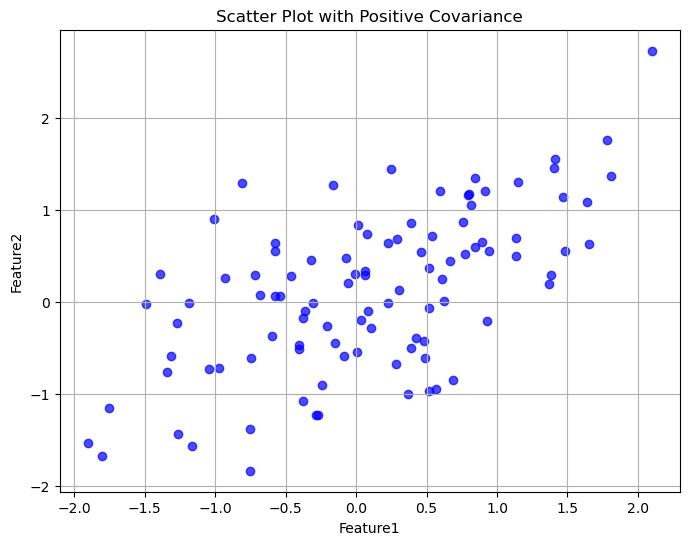

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate random data with a positive covariance
mean = [0, 0]
covariance_matrix = [[1, 0.7], [0.7, 1]]  # Positive covariance

# Create a random dataset
data = np.random.multivariate_normal(mean, covariance_matrix, 100)

# Extract two features from the dataset
feature1 = data[:, 0]
feature2 = data[:, 1]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(feature1, feature2, color='blue', marker='o', alpha=0.7)

# Add labels and title
plt.title('Scatter Plot with Positive Covariance')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.grid(True)
plt.show()


# SCATTER PLOT MATRIX - SPLOM

In [22]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


C:\Users\FATIMA SHAIKH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

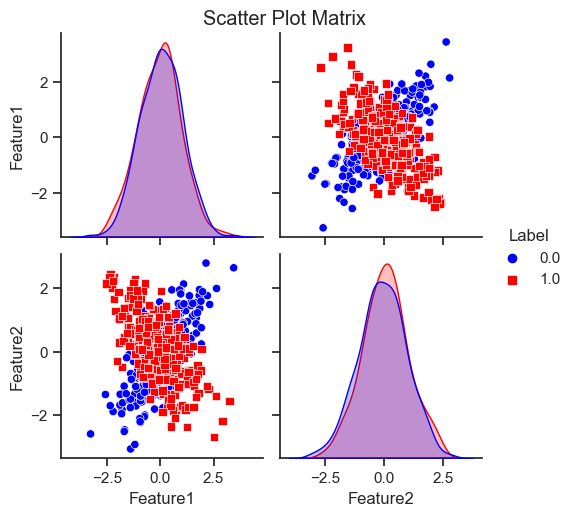

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Set seed for reproducibility
np.random.seed(42)

# Generate random data with positive covariance
mean = [0, 0]
covariance_matrix = [[1, 0.7], [0.7, 1]]
data_positive = np.random.multivariate_normal(mean, covariance_matrix, 300)

# Generate random data with negative covariance
covariance_matrix = [[1, -0.7], [-0.7, 1]]
data_negative = np.random.multivariate_normal(mean, covariance_matrix, 300)

# Combine the datasets
data = np.vstack([data_positive, data_negative])
labels = np.hstack([np.zeros(300), np.ones(300)])

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Create a DataFrame for Seaborn
import pandas as pd
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
df['Label'] = labels

# Create a scatter plot matrix
plt.figure(figsize=(10, 8))
sns.set(style="ticks")
sns.pairplot(df, hue="Label", markers=["o", "s"], palette={0: 'blue', 1: 'red'})
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()


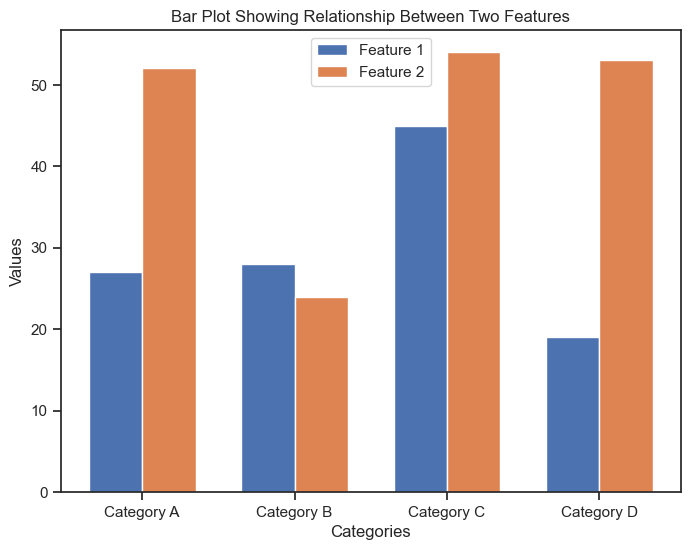

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random categorical data for two features
categories = ['Category A', 'Category B', 'Category C', 'Category D']
feature1_values = np.random.randint(10, 50, size=len(categories))
feature2_values = np.random.randint(20, 60, size=len(categories))

# Create a bar plot
plt.figure(figsize=(8, 6))
bar_width = 0.35

# Set positions for the bars
bar_positions1 = np.arange(len(categories))
bar_positions2 = bar_positions1 + bar_width

# Plot the bars
plt.bar(bar_positions1, feature1_values, width=bar_width, label='Feature 1')
plt.bar(bar_positions2, feature2_values, width=bar_width, label='Feature 2')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot Showing Relationship Between Two Features')
plt.xticks(bar_positions1 + bar_width / 2, categories)
plt.legend()

plt.show()


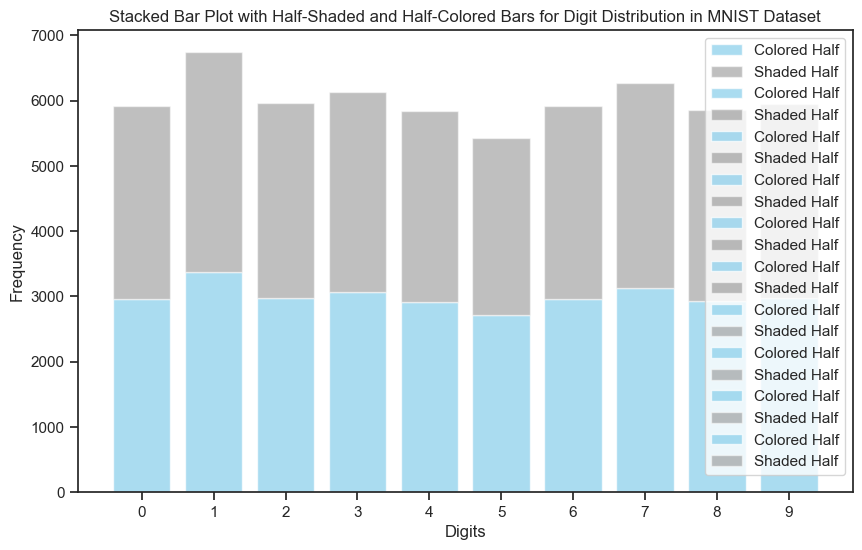

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(_, train_labels), (_, _) = mnist.load_data()

# Calculate the frequency of each digit
digit_counts = np.bincount(train_labels)

# Digits (categories) and their corresponding names
digits = np.arange(10)
digit_names = [str(d) for d in digits]

# Create a stacked bar plot with half-shaded and half-colored bars
plt.figure(figsize=(10, 6))

for digit in digits:
    total_count = digit_counts[digit]
    half_count = total_count // 2
    
    plt.bar(digit, half_count, color='skyblue', alpha=0.7, label='Colored Half')
    plt.bar(digit, total_count - half_count, color='gray', alpha=0.5, bottom=half_count, label='Shaded Half')

# Add labels and title
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Stacked Bar Plot with Half-Shaded and Half-Colored Bars for Digit Distribution in MNIST Dataset')
plt.xticks(digits, digit_names)
plt.legend()

plt.show()


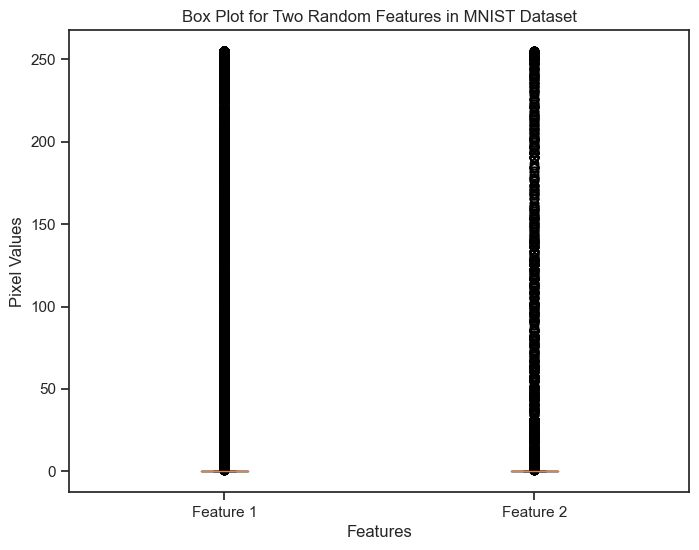

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, _), (_, _) = mnist.load_data()

# Flatten the images to 1D arrays
flattened_images = train_images.reshape(-1, 28 * 28)

# Select two random features (pixels) for the box plot
feature1 = flattened_images[:, 100]  # Replace with the index of your choice
feature2 = flattened_images[:, 200]  # Replace with the index of your choice

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot([feature1, feature2], labels=['Feature 1', 'Feature 2'])

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Pixel Values')
plt.title('Box Plot for Two Random Features in MNIST Dataset')

plt.show()


In [32]:
def range_normalization(feature, low, high):
    # Calculate min and max of the feature
    min_val = np.min(feature)
    max_val = np.max(feature)
    
    # Perform range normalization
    normalized_feature = (feature - min_val) / (max_val - min_val) * (high - low) + low
    
    return normalized_feature

# Example usage
feature_to_normalize = np.array([1, 2, 3, 4, 5])
low_range = 0
high_range = 1

normalized_feature = range_normalization(feature_to_normalize, low_range, high_range)
print("Original Feature:", feature_to_normalize)
print("Normalized Feature:", normalized_feature)


Original Feature: [1 2 3 4 5]
Normalized Feature: [0.   0.25 0.5  0.75 1.  ]


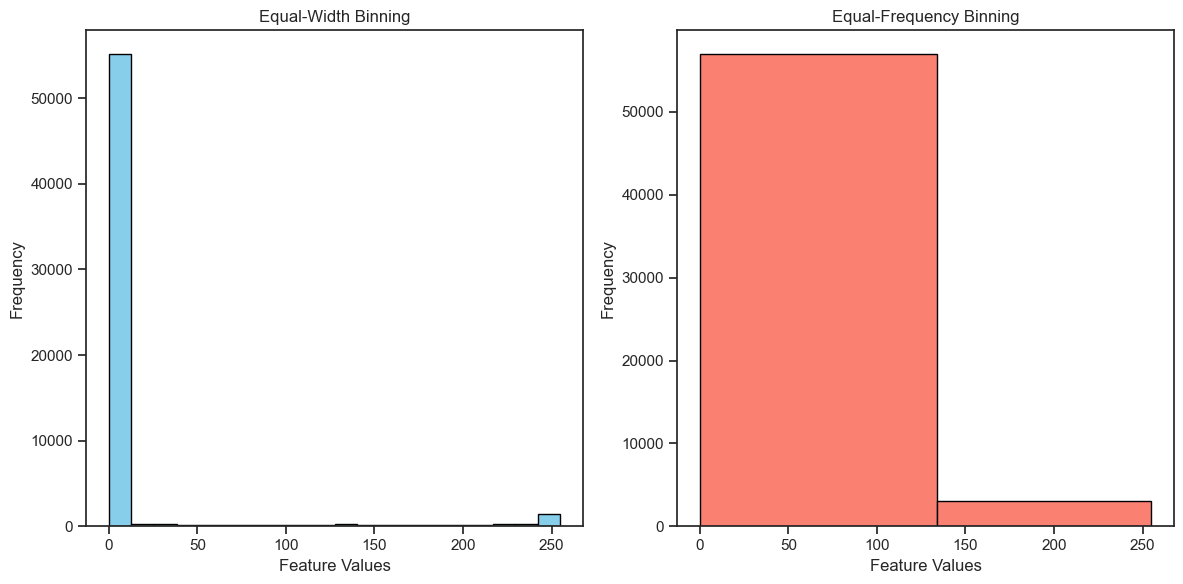

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, _), (_, _) = mnist.load_data()

# Flatten the images to 1D arrays
flattened_images = train_images.reshape(-1, 784)

# Select a feature for demonstration
feature_to_bin = flattened_images[:, 100]  # Replace with the index of your choice

# Define the number of bins
num_bins = 20

# Equal-width binning
equal_width_bins = np.linspace(np.min(feature_to_bin), np.max(feature_to_bin), num_bins + 1)

# Equal-frequency binning
equal_frequency_bins = np.percentile(feature_to_bin, np.linspace(0, 100, num_bins + 1))

# Create histograms for both binning methods
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(feature_to_bin, bins=equal_width_bins, color='skyblue', edgecolor='black')
plt.title('Equal-Width Binning')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(feature_to_bin, bins=equal_frequency_bins, color='salmon', edgecolor='black')
plt.title('Equal-Frequency Binning')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\FATIMA SHAIKH\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy on the subset: 1.00


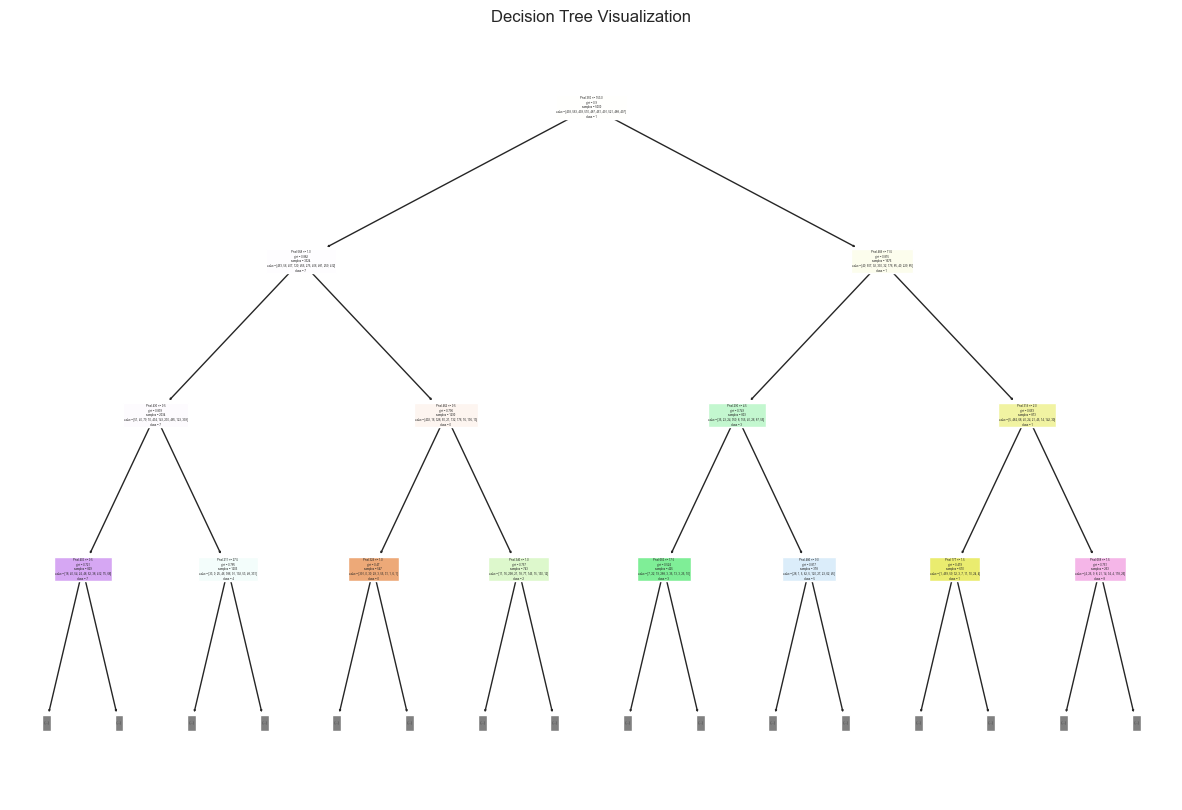

In [34]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

# Load a subset of MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Select a small subset for simplicity and speed
subset_size = 5000
X_subset, _, y_subset, _ = train_test_split(X, y, train_size=subset_size, stratify=y, random_state=42)

# Train a decision tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_subset, y_subset)

# Evaluate the classifier on the subset
y_pred = tree_classifier.predict(X_subset)
accuracy = metrics.accuracy_score(y_subset, y_pred)
print(f"Accuracy on the subset: {accuracy:.2f}")

# Plot the decision tree (simplified for visualization)
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(tree_classifier, max_depth=3, filled=True, feature_names=[f'Pixel {i}' for i in range(X.shape[1])], class_names=[str(i) for i in range(10)])
plt.title("Decision Tree Visualization")
plt.show()


In [35]:
import numpy as np

def shannon_entropy(probabilities):
    # Ensure probabilities sum to 1
    if not np.isclose(np.sum(probabilities), 1.0):
        raise ValueError("Probabilities must sum to 1.")

    # Calculate entropy
    entropy = -np.sum(p * np.log2(p) for p in probabilities if p > 0)
    return entropy

# Example usage
probabilities_set1 = [0.1, 0.2, 0.3, 0.4]
entropy_set1 = shannon_entropy(probabilities_set1)

probabilities_set2 = [0.25, 0.25, 0.25, 0.25]
entropy_set2 = shannon_entropy(probabilities_set2)

print(f"Entropy of Set 1: {entropy_set1:.4f}")
print(f"Entropy of Set 2: {entropy_set2:.4f}")


Entropy of Set 1: 1.8464
Entropy of Set 2: 2.0000


C:\Users\FATIMA SHAIKH\AppData\Local\Temp\ipykernel_28432\442132215.py:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  entropy = -np.sum(p * np.log2(p) for p in probabilities if p > 0)


In [36]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Load a subset of MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Select a small subset for simplicity and speed
subset_size = 5000
X_subset, X_test, y_subset, y_test = train_test_split(X, y, train_size=subset_size, stratify=y, random_state=42)

# Train a decision tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_subset, y_subset)

# Evaluate the classifier on the test set
y_pred = tree_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")


C:\Users\FATIMA SHAIKH\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy on the test set: 0.77
